# DSM_0515
## 主題: 機器學習(3) - 整體學習（Ensemble Learning）：隨機森林與 XGBoost
### 專案目標: 


Host: Isaac

Time: 2025/05/15

參考書目: 精通機器學習｜使用 Scikit-Learn , Keras 與 TensorFlow, 2/e


關鍵字:



# 1.整體學習簡介（What is Ensemble Learning）

## 1.1 定義

整體學習（Ensemble Learning）是一種機器學習技術，透過結合多個基礎模型（Base Learners）來產生一個更強大的預測模型。其核心理念是「群眾的智慧」：將多個弱學習器（通常表現不佳或不穩定）組合成一個強學習器，以提升整體模型的穩定性、準確率與泛化能力。

如果你匯總一群專家的意見，通常會比單一專家的意見更準確。 我們的預測器就是專家，一群預測器就是一個整體，因此這種技術稱為整體學習，使用的演算法稱為整體方法。

## 1.2 為什麼需要整體學習

單一模型容易受到訓練資料的擾動或偏差影響，導致過擬合或準確率不足。整體學習藉由引入多樣性與重複性，平均化各模型的誤差，使得整體表現更為穩健。

## 1.3 整體學習類型分類

整體學習主要可分為以下幾種類型：

| 類型          | 核心機制      | 模型關係 | 常見方法             |
| ----------- | --------- | ---- | ---------------- |
| 投票型（Voting） | 多模型表決     | 平行   | 硬投票、軟投票          |
| Bagging     | 資料抽樣、獨立訓練 | 平行   | 隨機森林             |
| Boosting    | 錯誤導向、序列訓練 | 逐步關聯 | AdaBoost、XGBoost |
| Stacking    | 預測結果再訓練   | 分層結構 | 任意模型堆疊           |




# 2. 投票分類器（Voting Classifier）

投票分類器是整體學習中最簡單的一種方式，它會結合多個已訓練好的分類模型（如邏輯回歸、支援向量機、決策樹等），依據它們對某一樣本的預測進行「投票表決」。

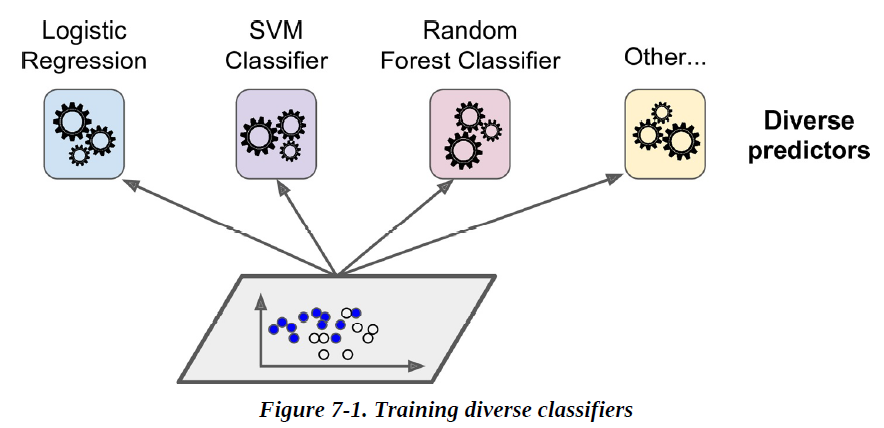

## 2.1 投票分類器的工作原理

### 2.1.1 硬投票（Hard Voting）

每個基礎模型直接輸出其所預測的類別標籤。最終的預測結果為`票數最多`的類別。

範例：

* 模型1：貓
* 模型2：狗
* 模型3：貓
* 最終結果：貓（因為 2 票 > 1 票）

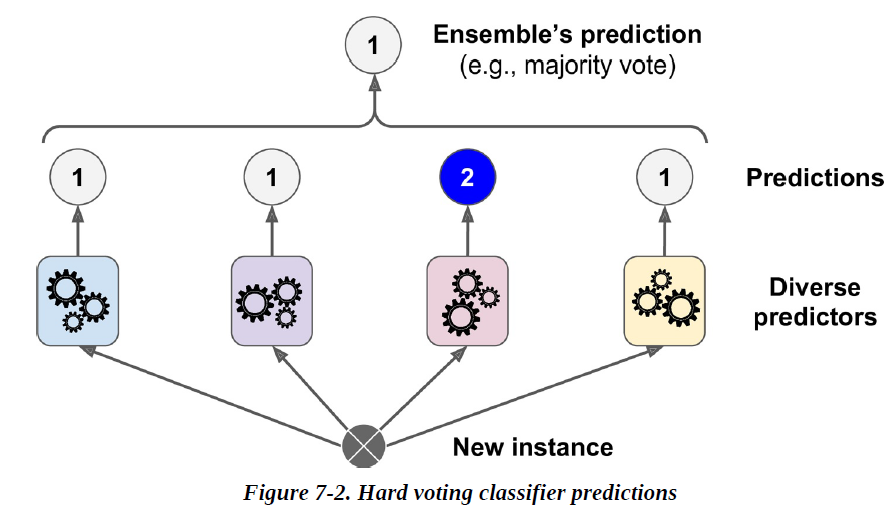

### 2.1.2 軟投票（Soft Voting）

模型輸出的是每個類別的機率分布，將所有模型的機率進行平均後選取`最大機率`對應的類別。

範例：

* 模型1：\[貓: 0.7, 狗: 0.3]
* 模型2：\[貓: 0.6, 狗: 0.4]
* 模型3：\[貓: 0.2, 狗: 0.8]
* 平均：\[貓: 0.5, 狗: 0.5]（視情況可能會預設先選某類別）

## 2.2 大數法則

這種投票分類器，準確度通常比整理裡面最佳的分類器還要高?


### 2.2.1 單一模型可能會犯錯

假設你有一個模型，它每次預測的準確率是 **51%**，也就是說：

* 如果你讓它預測 100 次，有大約 51 次是對的，49 次是錯的。
* 聽起來不怎麼厲害對吧？但它還是比亂猜（50%）稍微好一點。


### 2.2.2 你有很多顆這種「準確率 51%」的模型（或骰子）

每顆模型的準確率都只有 51%，就像你有很多顆「偏向某一個點」的骰子或硬幣。

現在，你讓這些模型**一起投票**（例如 11 個模型同時對一張圖片做分類），然後採用**多數決**：

* 如果有 6 個以上選「貓」，我們就說這張圖是貓，這就叫「硬投票（Hard Voting）」。

### 2.2.3 為什麼投票反而更準？

如果每個模型單獨預測，只靠運氣也會錯，但如果你讓很多個模型**一起表決**，就像你**擲很多次骰子或硬幣**後平均，整體趨勢會更穩定。

* 這就是圖中的「**大數法則**」：擲越多次，結果越接近真實機率。

**即使每個模型都只是「有一點點準」的模型，只要數量夠多，它們投票起來的結果會更準。**


### 2.2.4 你有 11 個準確率 51% 的模型

這些模型獨立工作，對一張圖片進行分類。如果你使用「多數決」：

* 只有在**大多數模型都錯誤**時，整體投票才會錯，但這種機率其實**遠比 49% 小得多**（可以用機率計算證明）

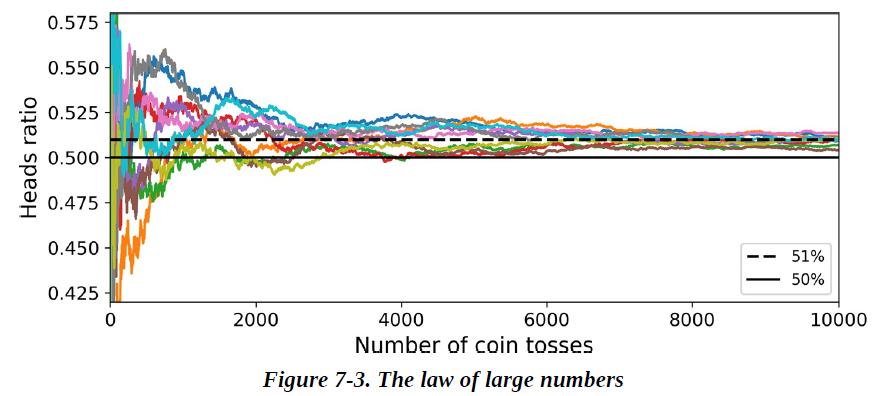

一開始每次擲幣結果波動很大（就像單一模型容易出錯），但當你擲幣越多次，**結果會越穩定在 50% 附近**（就像模型數量越多，預測越接近正確）

這就是「投票的力量」：即使單個模型很不準，整體結合之後，會因為錯誤彼此抵消，而變得更準。




## 2.3 實作範例 - Make_moons Dataset
moons 資料集是一組經典的機器學習測試資料，主要用於二分類模型的教學與評估。這個資料集的特點是資料點分布成兩個交錯的半月形，因此得名。

它的形狀天然地形成了非線性可分的分類問題，這使得線性分類器（如邏輯迴歸）難以有效處理，但也正好提供了一個適合測試非線性模型（如支援向量機、隨機森林等）的平台。

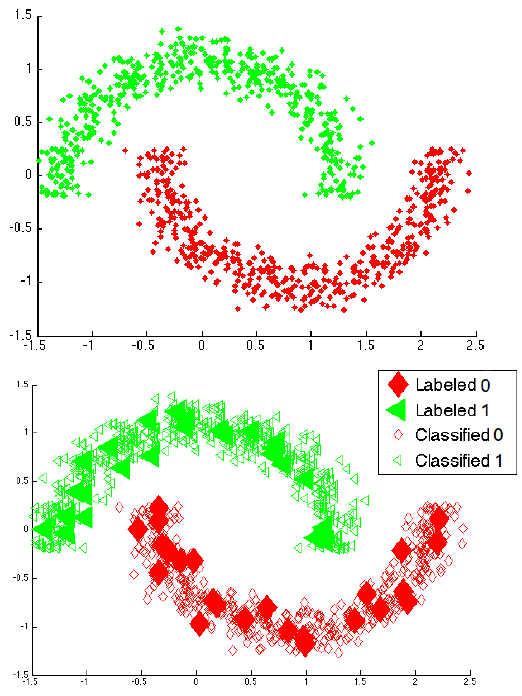

[Make_moons Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html)



In [8]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

# 產生 moons 資料集
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

# 切分訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定義三個基礎分類器
log_clf = LogisticRegression()
rf_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

# 建立 soft voting 分類器
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rf_clf), ('svc', svm_clf)],
    voting='soft'
)

# 訓練各分類器
log_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)
voting_clf.fit(X_train, y_train)

# 比較各模型準確率
models = {
    "Logistic Regression": log_clf,
    "Random Forest": rf_clf,
    "SVM": svm_clf,
    "Voting Classifier": voting_clf
}


比較一下各個模型跟投票分類器的準確率

In [10]:

results = {
    name: accuracy_score(y_test, model.predict(X_test))
    for name, model in models.items()
}

# 轉為 DataFrame 顯示
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])


results_df.sort_values(by="Accuracy", ascending=False, inplace=True)
print(results_df)

                 Model  Accuracy
3    Voting Classifier     0.920
1        Random Forest     0.915
2                  SVM     0.915
0  Logistic Regression     0.820


# 3. Bagging 與 Pasting
除了上述的投票方法之外，另一種做法是讓每個預測器都使用同一種訓練演算法，但抽取不同的隨機子集合來訓練每個預測器。

如果抽樣之後是會放回的話，這種方法稱為 `Bagging`（Bootstrap Aggregating），如果是無放回的話，則稱為 `Pasting`。

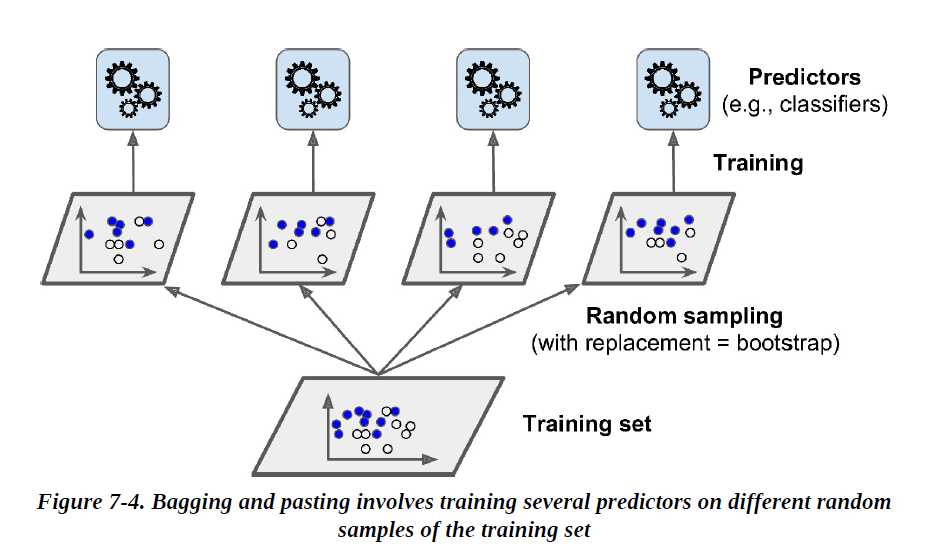

訓練所有預測器後，整體可以匯總每個預測器的預測對新案例進行預測。

通常匯總函數採取`統計模式`，像是平均值或中位數，對於分類問題則是投票表決。 

匯總可以降低偏差跟變異，並且可以減少過擬合的風險。

## 3.1 資料抽樣策略

**Bagging（Bootstrap Aggregating）**

* 資料集：從原始訓練集中有放回地隨機抽樣，形成多個樣本子集。
* 模型訓練：在每個子集上分別訓練一個模型。
* 預測方式：整合這些模型的預測結果，常以平均或投票方式做最終預測。

**Pasting**

* 與 Bagging 類似，但抽樣為**無放回**。
* 若訓練資料量較小，Pasting 較適合以保留更多資料多樣性。

[機器學習: Ensemble learning之Bagging、Boosting和AdaBoost](https://chih-sheng-huang821.medium.com/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-ensemble-learning%E4%B9%8Bbagging-boosting%E5%92%8Cadaboost-af031229ebc3)

## 3.2 Scikit-learn 實作範例
觀察一顆決策樹與 Baggging 的表現差異


In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from matplotlib.colors import ListedColormap

# BaggingClassifier
bag_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500, # 500 個基礎分類器
    max_samples=0.8, # 每個基礎分類器使用 80% 的訓練資料
    max_features=1.0, # 每個基礎分類器使用 100% 的特徵
    bootstrap=True, # 是否使用 bootstrap
    n_jobs=-1 # 使用所有 CPU 核心
)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

# 訓練模型
tree_clf.fit(X_train, y_train)
bag_clf.fit(X_train, y_train)

c:\Users\SHI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\SHI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=500, n_jobs=-1)

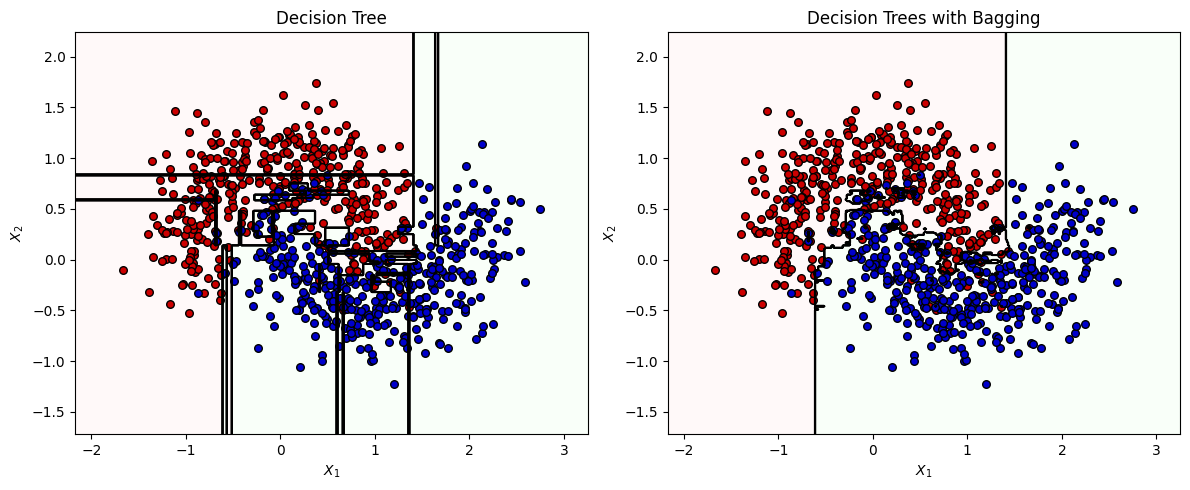

In [15]:
# 更新繪圖函數以加入決策邊界線
def plot_decision_boundary_with_contour(clf, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFEEEE', '#EEFFEE'])
    cmap_bold = ['#CC0000', '#0000CC']

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    # 加上決策邊界線
    ax.contour(xx, yy, Z, colors='k', linewidths=1)
    ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c=cmap_bold[0], label="Class 0", edgecolor='k', s=30)
    ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c=cmap_bold[1], label="Class 1", edgecolor='k', s=30)
    ax.set_title(title)
    ax.set_xlabel("$X_1$")
    ax.set_ylabel("$X_2$")

# 繪圖比較（含決策邊界）
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary_with_contour(tree_clf, X_train, y_train, axes[0], "Decision Tree")
plot_decision_boundary_with_contour(bag_clf, X_train, y_train, axes[1], "Decision Trees with Bagging")
plt.tight_layout()
plt.show()


## 3.3 Out-of-Bagging
Bagging 的一個優點是可以使用 `Out-of-Bag`（OOB）評估來估計模型的性能。這是因為在 Bagging 中，每個基礎模型都是在隨機抽樣的子集上訓練的，因此對於每個模型，會有一部分資料沒有被用來訓練，這些資料稱為 OOB 資料。

在 Bagging 中，每棵樹（或每個基礎模型）都是從訓練資料中「有放回地隨機抽樣」而得來的，這稱為 bootstrap sampling。

因為是有放回地抽樣：

- 每棵樹大約只會抽到 63% 的原始訓練樣本（機率為 $1 - (1 - \frac{1}{n})^n \approx 63%$）。

- 剩下的 37% 資料，這棵樹沒看過，這部分資料就稱為這棵樹的 Out-of-Bag（袋外）資料。

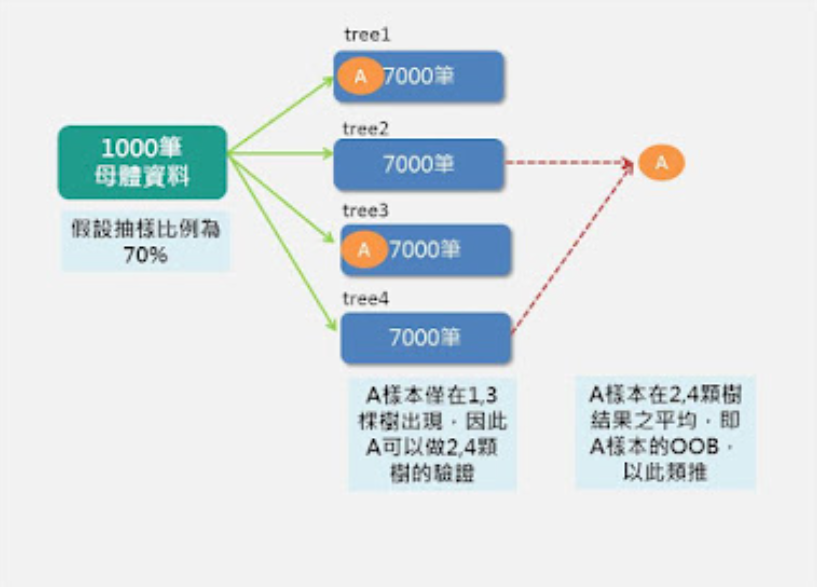

### 3.3.1 OOB 評估
這些袋外資料可以被用來：

- 測試該棵模型的預測能力

- 當作「模型對未知資料的表現評估」

- 無需再額外切分驗證集

這種方式就叫做 `Out-of-Bag evaluation`（袋外評估）。

>Out-of-Bagging 是 Bagging 模型中的「免費交叉驗證」方式，透過沒被抽到的資料，自動評估模型的泛化表現。
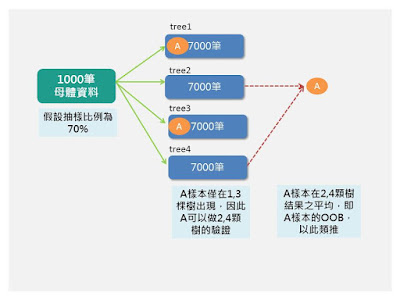

### 3.3.2 OOB實作

In [16]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    bootstrap=True,
    n_jobs=-1,
    oob_score=True
)

bag_clf.fit(X_train, y_train)
print("OOB score:", bag_clf.oob_score_)

OOB score: 0.9025


>模型在它沒看過的訓練樣本（Out-of-Bag 資料）上，準確率為 90.25%。

In [ ]:
from sklearn.metrics import accuracy_score

# 用完全獨立的測試集來評估模型
y_pred = bag_clf.predict(X_test)
print("Test set accuracy:", accuracy_score(y_test, y_pred))

Test set accuracy: 0.915


>其結果與 Test set accuracy 非常接近，這表示你的決策樹訓練穩定、泛化良好，未明顯過擬合。

## 3.4 隨機補丁（Random Patches）與隨機子空間（Random Subspaces）

隨機補丁與隨機子空間是讓模型「看不同部分資料」的進階技巧，有助於提升集成模型的多樣性、抑制過擬合，特別適合應用於高維或高相關特徵的問題中。


在 Bagging 框架中，每個基礎分類器（如決策樹）會從原始資料中隨機抽樣一部分訓練資料（row sampling）進行訓練，這可以降低模型的變異。

為了進一步提升模型的多樣性與抗過擬合能力，研究者提出了以下兩個延伸策略：


### 3.4.1 隨機子空間（Random Subspaces）
僅從原始特徵中**隨機抽取部分特徵（columns）**，用來訓練每一個基礎模型。


* 強調的是「**特徵選擇的隨機性**」，適合特徵維度很高（例如影像、文字資料）時使用，避免某些主導特徵讓所有基礎模型學得太相似。


在 `BaggingClassifier` 或 `RandomForestClassifier` 中設定：

```python
max_features < 1.0  # 例如 0.5 表示每棵樹只看到一半的特徵
```


### 3.4.2 隨機補丁（Random Patches）
每個基礎分類器從訓練集中**同時隨機抽取樣本（rows）與特徵（columns）**。


* 結合了 row sampling（Bagging）與 column sampling（Subspaces），強化模型多樣性、進一步抑制過擬合，可以視為 Random Forest 的更一般化形式

在 `BaggingClassifier` 中設定：

```python
max_samples < 1.0  # 抽樣資料數量比例
max_features < 1.0  # 抽樣特徵數量比例
```





# 4. Bagging 實踐 - 隨機森林（Random Forest）

隨機森林是由多棵決策樹所構成的整體模型，屬於 Bagging 方法的一種變形。其在每次建立子模型（決策樹）時，除了隨機選取訓練資料外，也會隨機選擇特徵子集，以增加模型之間的差異性。

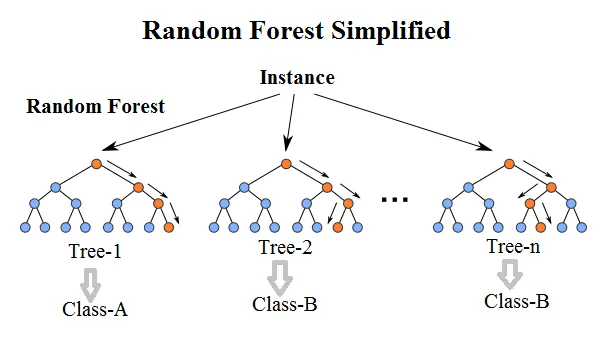


[參考網址](https://medium.com/chung-yi/ml%E5%85%A5%E9%96%80-%E5%8D%81%E4%B8%83-%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97-random-forest-6afc24871857)

## 4.1 構建流程

1. 使用 Bootstrap (有放回抽樣) 隨機選取訓練資料，建立多棵決策樹
2. 每棵樹在分裂節點時只選擇部分隨機特徵來進行切割（非全部）
3. 多棵樹獨立訓練後，以投票方式整合預測結果
4. 最終預測結果為所有樹的預測結果的平均值（回歸）或投票結果（分類）

##  4.2 Make_moons Dataset 實作

In [19]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(
    n_estimators=500,
    max_leaf_nodes=16,
    n_jobs=-1,
    oob_score=True
)

rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
print("Test set accuracy:", accuracy_score(y_test, y_pred))

Test set accuracy: 0.925


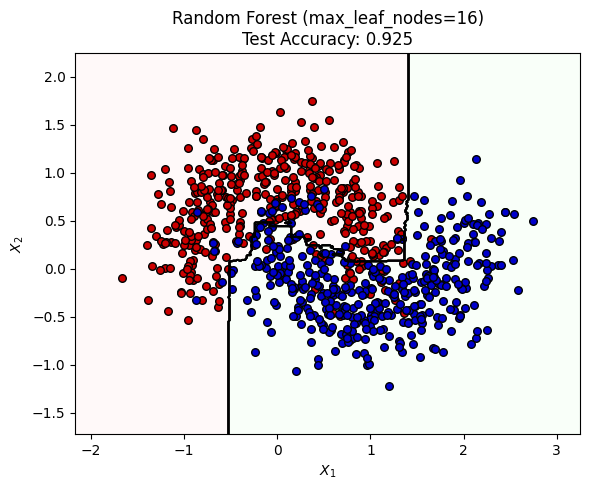

In [20]:
# 重新載入必要模組並執行隨機森林視覺化（決策邊界）
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 建立並訓練隨機森林模型
rnd_clf = RandomForestClassifier(
    n_estimators=500,
    max_leaf_nodes=16,
    n_jobs=-1,
    oob_score=True,
    random_state=42
)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

# 使用之前的繪圖函數
def plot_decision_boundary_with_contour(clf, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFEEEE', '#EEFFEE'])
    cmap_bold = ['#CC0000', '#0000CC']

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    ax.contour(xx, yy, Z, colors='k', linewidths=1)
    ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c=cmap_bold[0], label="Class 0", edgecolor='k', s=30)
    ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c=cmap_bold[1], label="Class 1", edgecolor='k', s=30)
    ax.set_title(f"{title}\nTest Accuracy: {test_acc:.3f}")
    ax.set_xlabel("$X_1$")
    ax.set_ylabel("$X_2$")

# 繪圖
fig, ax = plt.subplots(figsize=(6, 5))
plot_decision_boundary_with_contour(rnd_clf, X_train, y_train, ax, "Random Forest (max_leaf_nodes=16)")
plt.tight_layout()
plt.show()


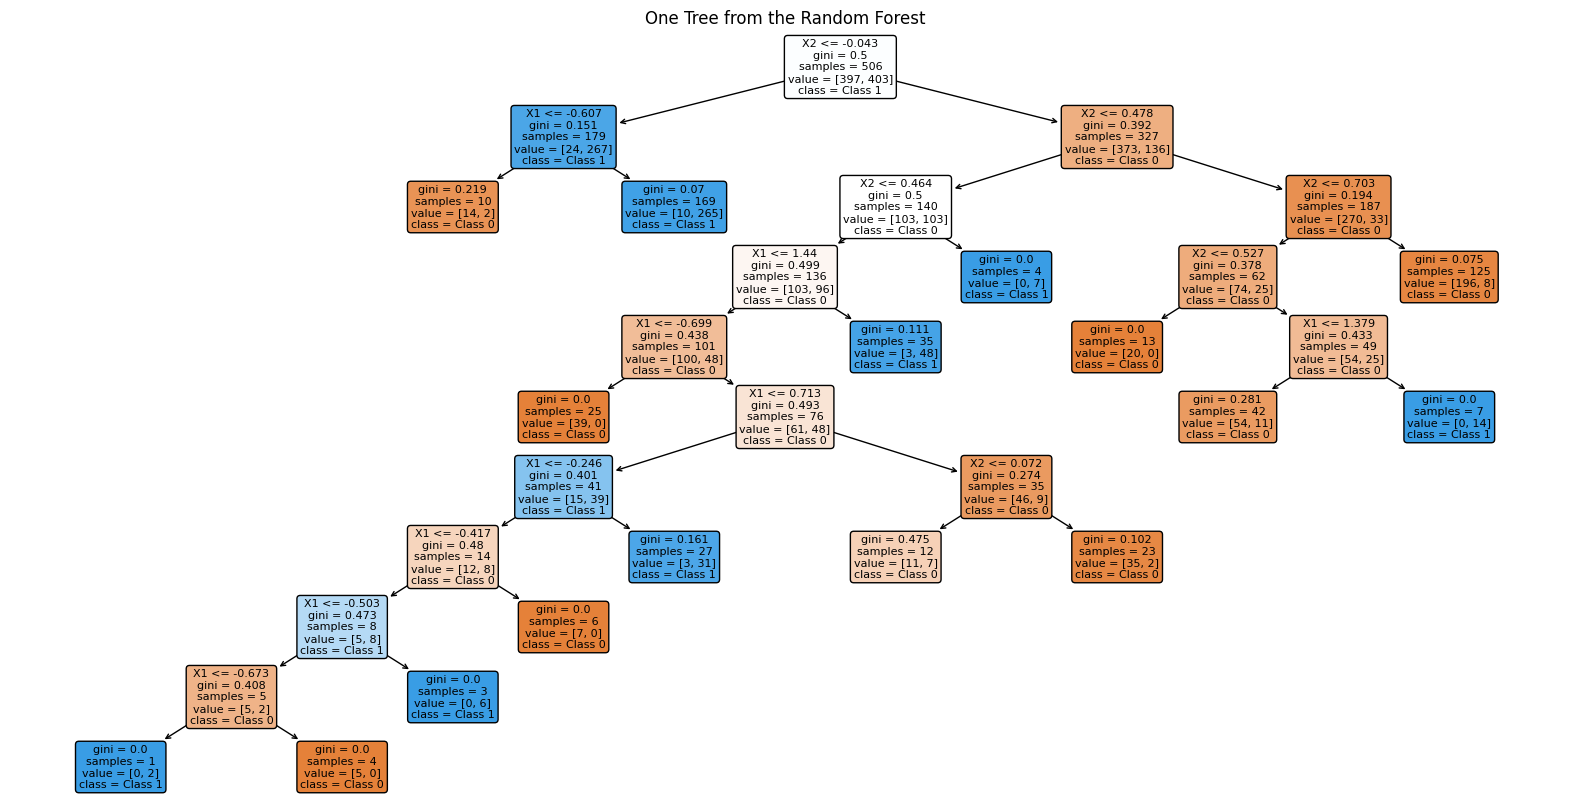

In [23]:
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 隨機挑選一棵樹（例如第 0 棵）
one_tree = rnd_clf.estimators_[0]

# 畫出這棵樹的結構
plt.figure(figsize=(20, 10))
plot_tree(one_tree,
          feature_names=["X1", "X2"],
          class_names=["Class 0", "Class 1"],
          filled=True,
          rounded=True)
plt.title("One Tree from the Random Forest")
plt.show()


## 4.3 Iris Dataset 實作 

C:\Users\SHI\AppData\Local\Temp\ipykernel_25284\779337061.py:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)


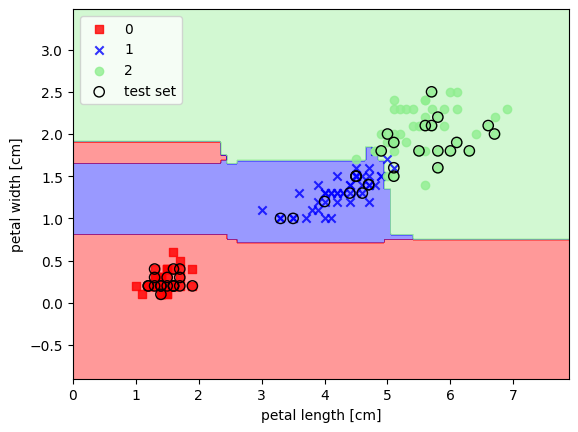

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup markers generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 =  np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
    
    # hightlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    facecolors='none', edgecolors='black',
                    alpha=1.0, linewidth=1, marker='o', s=55, label='test set')


def main():
  iris = datasets.load_iris()
  x_train, x_test, y_train, y_test = train_test_split(iris.data[:, [2, 3]], iris.target, test_size=0.25, random_state=4)
  clf = RandomForestClassifier(n_estimators=20, max_depth=4)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)

  X_combined = np.vstack((x_train, x_test))
  y_combined = np.hstack((y_train, y_test))
  
  plot_decision_regions(X_combined, y_combined, classifier=clf, test_idx=range(105, 150))
  plt.xlabel('petal length [cm]')
  plt.ylabel('petal width [cm]')
  plt.legend(loc='upper left')
  plt.show()


if __name__ == '__main__':
    main()

## 4.4 極端樹（Extra Trees）

Extra Trees（全名：**Extremely Randomized Trees**）是一種和隨機森林非常相似的集成學習方法，它同樣是由多棵決策樹組成的集成模型，主要用於分類或回歸任務。

Extra Trees 是對隨機森林的進一步`「隨機化」`，它的目的是進一步`降低模型的變異`（variance），使模型更穩定、泛化更好。

與隨機森林相比，Extra Trees 在兩個地方引入了更多隨機性：


### 4.4.1 具體差異說明

#### 資料抽樣方式

* 隨機森林：每棵樹用 bootstrap 抽樣的子集訓練。
* Extra Trees：通常直接用整個訓練集（不抽樣），但也可以設定成抽樣。

### 節點分裂策略

* 隨機森林：在每個節點，從隨機選出的特徵中，找最佳分割點（根據基尼指數、熵等）。
* Extra Trees：從隨機選出的特徵中，**隨機選一個分割點**，不去找最佳的。

這使得每棵樹變得更不相似，也就使集成模型的多樣性變大，進而降低過擬合。

### 4.4.2 Extra Trees 的優缺點

### 優點

* 訓練速度快（不需要搜尋最佳切點）
* 過擬合風險低（更高的隨機性增加多樣性）
* 支援並行訓練（同樣適用於 `n_jobs=-1`）

### 缺點

* 比隨機森林更不穩定（因為更隨機）
* 若資料量少，模型準確度可能略低



#### 什麼時候使用 Extra Trees？

* 想要快速訓練但又不想用太深層的模型
* 當你的資料特徵很多，並希望增加模型隨機性以防過擬合
* 當你在比較不同集成方法的效果時，可作為與隨機森林的對照組






## <span style="color:skyblue">補充：4.5 特徵重要性（Feature Importance）</span>

特徵重要性是隨機森林模型的一大優勢，能幫助我們理解哪些特徵對預測結果影響最大，有助於特徵選擇、資料理解與模型解釋。

常見的特徵重要性計算方式包括：

1. **不純度減少（Mean Decrease in Impurity, MDI）**
   又稱 Gini Importance，為隨機森林的預設方式。計算每個特徵在樹中用來分裂節點時所造成的不純度減少量，並在所有樹上加總平均。

2. **隨機擾動重要性（Permutation Importance）**
   將特徵的值隨機打亂，觀察模型效能（如準確率）是否明顯下降。若下降幅度大，該特徵即被視為重要。這方法與模型無關，能用於任何類型的模型。

3. **SHAP 值（TreeSHAP）**
   基於博弈論的 Shapley 值，用於精確量化每個特徵對每筆資料預測的貢獻，並能處理非線性與特徵交互關係，是目前最被推薦的解釋方法之一。

4. **準確率下降法（Mean Decrease Accuracy）**
   此方法是 Permutation Importance 的一種變體，專門以模型的準確率為評估依據，觀察打亂特徵後準確率的變化幅度。





### 4.5.1 MNIST 資料集實作

1. 載入與預處理 MNIST 資料

In [26]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# 載入 MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype('int')

# 簡化運算：只使用前 10000 筆
X, y = X[:10000], y[:10000]

# 切分資料
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


c:\Users\SHI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


2. 訓練隨機森林

In [27]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

3. 繪製特徵重要性圖

觀察`哪些像素對所有數字分類最有貢獻`（而不是對某一張圖片）。

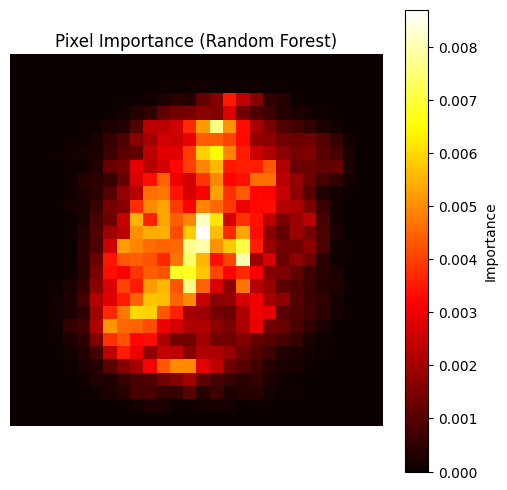

In [32]:
# 取得每個像素的特徵重要性
importances = clf.feature_importances_

# reshape 成 28×28 圖片
importances_image = importances.reshape(28, 28)

# # 顯示原始圖片
# plt.figure(figsize=(6, 6))
# plt.imshow(X[].reshape(28, 28), cmap='gray')
# plt.title("Original Image")
# plt.axis('off')
# plt.show()

# 顯示整體樸片特徵重要性熱圖
plt.figure(figsize=(6, 6))
plt.imshow(importances_image, cmap='hot', interpolation='nearest')
plt.title("Pixel Importance (Random Forest)")
plt.colorbar(label='Importance')
plt.axis('off')
plt.show()



# 5.Boosting (增強學習)
Boosting 是另一種序列式訓練的整體學習策略，每個新模型的訓練會專注於`前一模型做錯的樣本`。

逐步強化模型表現，使最終的集成模型具備更小的偏差與更強的學習能力。

Boosting 會把一些弱學習器（如淺層決策樹）結合成一個強學習器。這些弱學習器通常是簡單的模型，單獨使用時表現不佳，但當它們結合在一起時，可以顯著提高預測準確率。

## 5.1 工作機制

1. 初始化：訓練第一個弱分類器
2. 加權錯誤：針對錯誤分類的樣本提高權重
3. 重複步驟：訓練下一個模型專注於錯誤樣本
4. 加權結合：根據每個模型的表現加權整合

## 5.3 常見演算法

* AdaBoost：將每個樣本附上權重，逐步強調錯誤樣本
* Gradient Boosting：以梯度下降方式最小化損失函數
* **XGBoost**：Gradient Boosting 的高效實作（詳見下一節）

## 5.4 優缺點

| 優點           | 缺點          |
| ------------ | ----------- |
| 高準確率、擅長處理偏差  | 對雜訊與過擬合較敏感  |
| 能處理多種資料型態與任務 | 訓練速度較慢，不可並行 |



## 5.5 Boosting 演算法
### 5.5.1 AdaBoost
AdaBoost（Adaptive Boosting）是最早的 Boosting 方法之一，主要用於二分類問題。

主要方式是`提高被前幾個分類器線性組合的分類錯誤樣本的權重`，這樣做可以讓每次訓練新的分類器的時後都聚焦在容易分類錯誤的訓練樣本上。每個弱分類器使用加權投票機制取代平均投票機制，只的準確率較大的弱分類器有較大的權重，反之，準確率低的弱分類器權重較低。

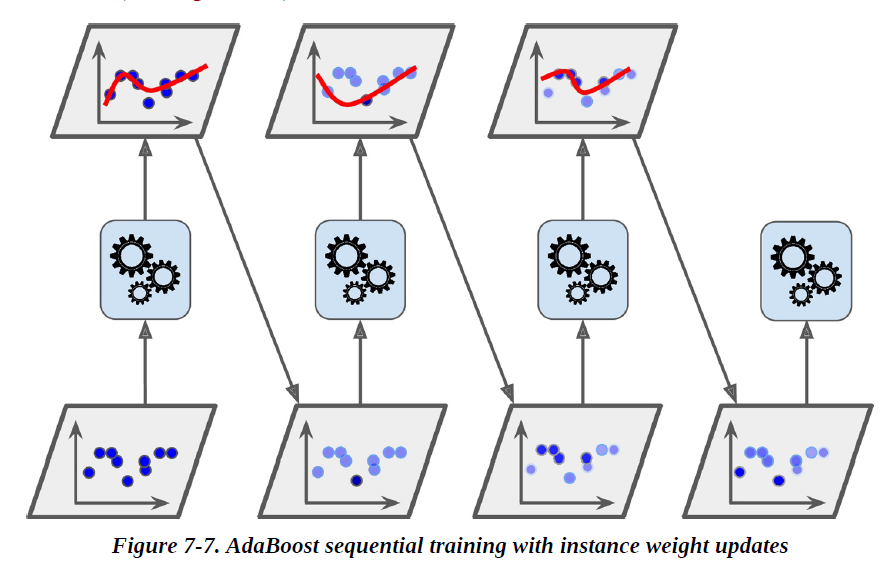

### 5.5.2 Gradient Boosting
Gradient Boosting 由 Friedman 在 1999 年提出，是 Boosting 的一般化形式，適用於任意可微損失函數。其核心概念是：每次迭代訓練一個模型來`學習上一輪模型的殘差（即誤差）`，並藉由梯度的方向來引導下一輪學習。

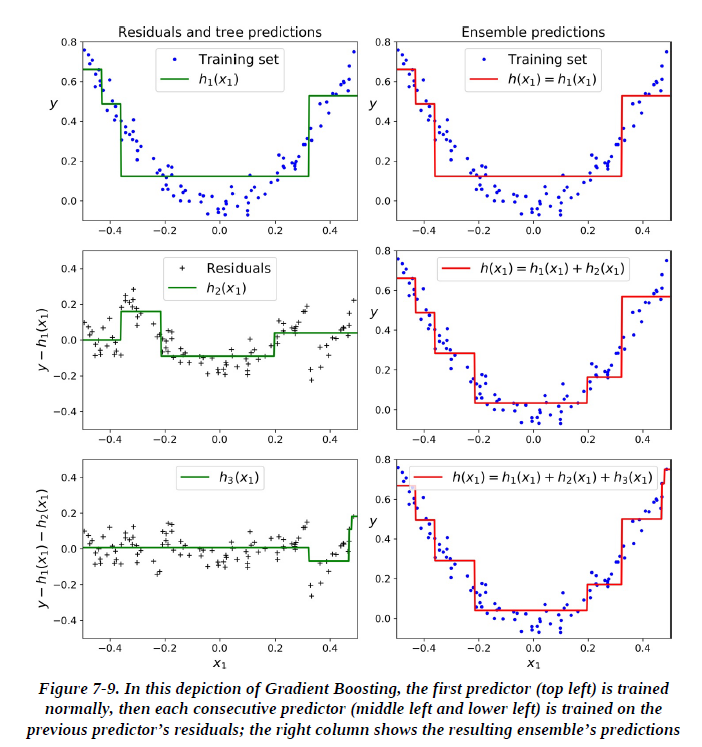


# 6. XGBoost（Extreme Gradient Boosting）

XGBoost 是由陳天奇於 2016 年開發的高效 Gradient Boosting 框架，其名稱來自 "Extreme Gradient Boosting"。它針對傳統 Gradient Boosting 的效能與資源需求問題進行大量優化，廣泛應用於各大資料競賽與產業應用中。

## 6.1 技術強化點

* **正規化**：透過 L1（Lasso）與 L2（Ridge）正規化控制模型複雜度
* **剪枝策略**：使用後剪枝（Post-Pruning）而非預剪枝，提高準確率(後剪枝是指在樹建立完成後，對樹進行剪枝以減少過擬合)
* **並行處理**：能夠在建立樹的過程中進行特徵分裂候選排序的並行化
* **稀疏感知處理**：自動處理遺漏值與稀疏資料
* **自動類別不平衡處理**：內建 scale\_pos\_weight 等參數


## <span style="color:skyblue">6.2 補充：剪枝(Pruning)</span>
剪枝（Pruning） 是決策樹學習中的一種技術，用來`減少模型過擬合、提升泛化能力`。它的核心目標是讓樹不要長得太複雜，避免「記住雜訊」而喪失對新資料的預測力。

## 6.3 XGBoost 實作: 鐵達尼號
簡單使用鐵達尼資料中的性別、艙等、年齡來預測乘客是否存活，比較羅吉斯迴歸、隨機森林、XGBoost 的準確率。

Titanic 是一個 小型（<1000 筆）且結構清晰的資料集，沒有太多稀疏性，也沒有高維度的特徵，我們來看看 XGBoost 的表現如何。

1. 載入資料集

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# 載入資料
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# 選擇特徵與目標
X = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
y = df["Survived"]

# 處理缺失值
X["Age"].fillna(X["Age"].median(), inplace=True)
X["Embarked"].fillna(X["Embarked"].mode()[0], inplace=True)

# Label encoding for categorical features
label_encoders = {}
for col in ["Sex", "Embarked"]:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# 切分訓練與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\SHI\AppData\Local\Temp\ipykernel_25284\3683654085.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["Age"].fillna(X["Age"].median(), inplace=True)
C:\Users\SHI\AppData\Local\Temp\ipykernel_25284\3683654085.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Age"].fillna(X["Age"].median(), inplace=True)
C:\Users\SHI\AppData\Lo

2. 訓練模型

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Logistic Regression（使用預設參數）
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
log_acc = accuracy_score(y_test, log_clf.predict(X_test))

# Random Forest（使用預設參數）
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf_clf.predict(X_test))

# XGBoost（使用預設參數）
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_acc = accuracy_score(y_test, xgb_clf.predict(X_test))


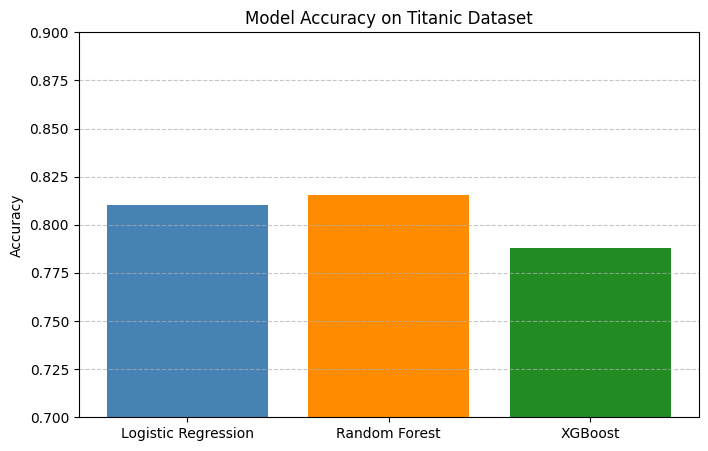

In [ ]:
# 結果視覺化
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [log_acc, rf_acc, xgb_acc]
})

plt.figure(figsize=(8, 5))
plt.bar(results_df["Model"], results_df["Accuracy"], color=['steelblue', 'darkorange', 'forestgreen'])
plt.ylim(0.7, 0.9)
plt.ylabel("Accuracy")
plt.title("Model Accuracy on Titanic Dataset")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


>XGBoost 並非萬能，在沒有調參、特徵工程、早停等優化的前提下，其優勢不一定能顯現出來。隨機森林在小型結構化資料中，反而因其穩健性與低偏差特性，在 baseline 階段就能取得不錯的表現

試著用`GridSearchCV` 找到 XGBoost 的最佳參數，看看能否進一步提升準確率。

In [82]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# 建立參數搜尋範圍
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.001, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# 建立 GridSearchCV 物件
xgb_base = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_search = GridSearchCV(estimator=xgb_base, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# 執行搜尋
grid_search.fit(X_train, y_train)

# 最佳參數與準確率
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# 使用最佳參數重新訓練並在測試集上評估
best_xgb = grid_search.best_estimator_
test_acc = accuracy_score(y_test, best_xgb.predict(X_test))

import pandas as pd
result_df = pd.DataFrame([{
    "Best Params": best_params,
    "Train CV Accuracy": round(best_score, 4),
    "Test Accuracy": round(test_acc, 4)
}])

print(result_df)
print("Best Parameters:", best_params)
print("Train CV Accuracy:", round(best_score, 4))


                                         Best Params  Train CV Accuracy  \
0  {'colsample_bytree': 1.0, 'learning_rate': 0.0...             0.8287   

   Test Accuracy  
0         0.8101  
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Train CV Accuracy: 0.8287


c:\Users\SHI\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:51:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


c:\Users\SHI\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:52:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy with Best Parameters: 0.8101


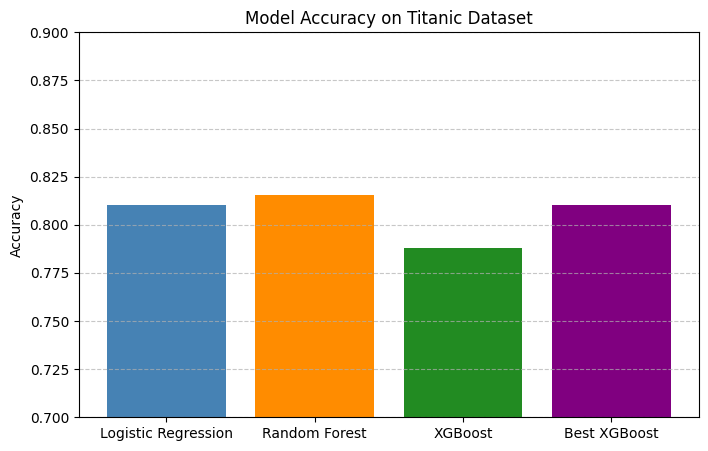

In [84]:
# 使用 Best Parameters 重新訓練
best_xgb = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss', random_state=42)
best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print("Test Accuracy with Best Parameters:", round(test_acc, 4))
# 再跟原本的其他模型比較
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost", "Best XGBoost"],
    "Accuracy": [log_acc, rf_acc, xgb_acc, test_acc]
})

plt.figure(figsize=(8, 5))
plt.bar(results_df["Model"], results_df["Accuracy"], color=['steelblue', 'darkorange', 'forestgreen', 'purple'])
plt.ylim(0.7, 0.9)
plt.ylabel("Accuracy")
plt.title("Model Accuracy on Titanic Dataset")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




# 7. Stacking（堆疊泛化）

Stacking 是一種將多種模型的預測結果作為新的特徵，訓練一個第二層的模型（又稱元學習器 Meta-learner）來進行最終預測的策略。不同於 Voting，Stacking 不僅考慮類別結果，更重視模型間的相互補償性。

>Stacking 就像是請一群不同專長的人一起投票，再請一個「總統」來做最後決定。



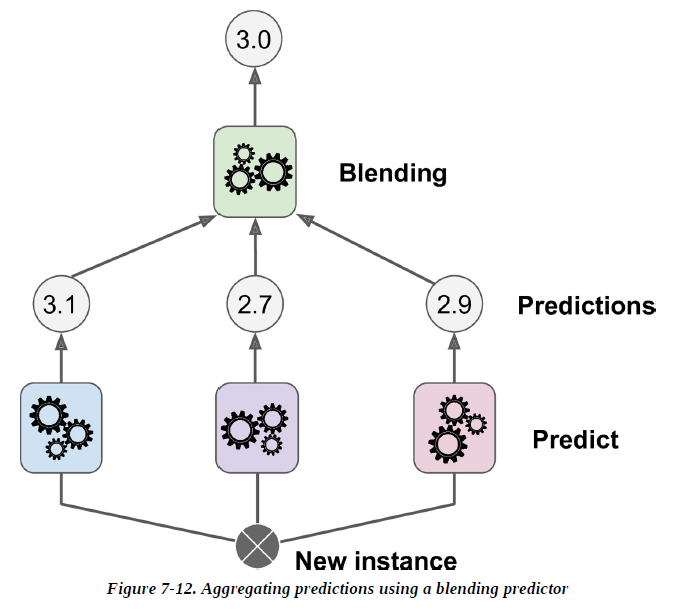


你要預測一個人會不會生病。你找來三位「醫療顧問」：

1. **醫生甲**：看血壓和體溫（用 Logistic Regression）
2. **醫生乙**：看年齡和家族史（用 Random Forest）
3. **醫生丙**：看飲食習慣和運動量（用 XGBoost）

他們各自給出「會生病 / 不會生病」的判斷。



然後你找來一位`「總顧問」`，他根據三位醫生的判斷結果，再做**最終的預測**。

這個總顧問的工作，就叫做「**第二層模型**」（meta model），整個流程就叫做 **Stacking**。

> 這樣做可以提升整體準確率，讓模型更聰明也更穩定。




